<a href="https://colab.research.google.com/github/ArnavJalan-30/digital_image_processing/blob/main/thresholding_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Q1) Display following stages
## a) Load 'news-msr-2.png' [Given]

In [69]:
# Read image in TensorFlow
img_path = '/content/news-msr-2.png'
img0 = cv.imread(img_path)
img = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
img = tf.convert_to_tensor(img, dtype=tf.uint16)

In [70]:
print(img.shape)

(613, 304)


In [71]:
print(img.dtype)

<dtype: 'uint16'>


In [72]:
# Define kernel
kernel_sz1 = tf.ones((1, 1), dtype=tf.float32)

In [73]:
# Change data type of image using TensorFlow and apply 1x1 identity kernal
img_a = tf.cast(img, tf.float32)  # Convert image to float32
img_a = tf.nn.conv2d( tf.reshape(img_a, (1,img_a.shape[0],img_a.shape[1],1)),\
                     tf.reshape(kernel_sz1,\
                      (kernel_sz1.shape[0],kernel_sz1.shape[1],1,1)),\
                      strides=[1, 1, 1, 1], padding='SAME')

In [74]:
# Print information about the image
print('Original Data_type is', img.dtype)
print('Kernel_sz1 =', kernel_sz1)
print('Data_type is', img_a.dtype)
print('Image Size is', img_a.shape)
print('Image min and max are ({}, {})'.format(tf.reduce_min(img_a),\
                                              tf.reduce_max(img_a)))

Original Data_type is <dtype: 'uint16'>
Kernel_sz1 = tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
Data_type is <dtype: 'float32'>
Image Size is (1, 613, 304, 1)
Image min and max are (12.0, 255.0)


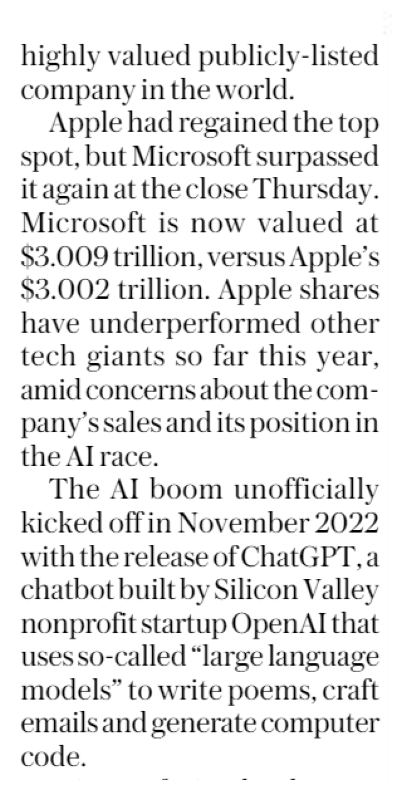

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(tf.squeeze(img_a), cmap='gray')
plt.axis('off')
plt.show()

## b) Load 'AI.png' [Given]


In [76]:
# Read image in TensorFlow
img_path = '/content/AI.png'
img0 = cv.imread(img_path)
img = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
img = tf.convert_to_tensor(img, dtype=tf.uint16)

In [77]:
# Change data type of image using TensorFlow and apply 1x1 identity kernal
img_b = tf.cast(img, tf.float32)  # Convert image to float32
img_b = tf.nn.conv2d( tf.reshape(img_b, (1,img_b.shape[0],img_b.shape[1],1)),\
                     tf.reshape(kernel_sz1,\
                      (kernel_sz1.shape[0],kernel_sz1.shape[1],1,1)),\
                      strides=[1, 1, 1, 1], padding='SAME')

In [78]:
print(img_b.shape)

(1, 24, 23, 1)


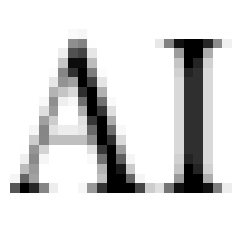

In [79]:
plt.figure(figsize=(3,3))
plt.imshow(tf.squeeze(img_b), cmap='gray')
plt.axis('off')
plt.show()

#c) Threshold both images at $(intensity<=228)$ intensity value [2 Marks]

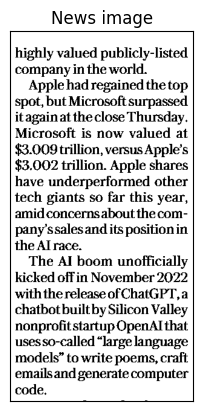

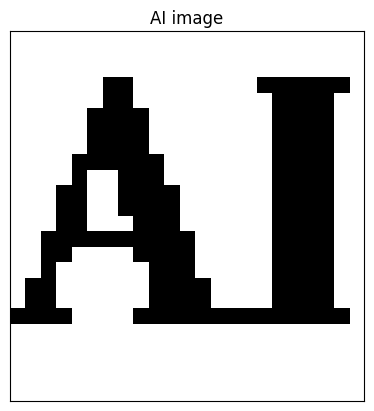

In [80]:
img1_thresh = cv.imread('news-msr-2.png', cv.IMREAD_GRAYSCALE)
img2_thresh = cv.imread('AI.png', cv.IMREAD_GRAYSCALE)
# cv.threshold(	src, thresh, maxval, type[, dst]	) -> 	retval, dst
ret,thresh1 = cv.threshold(img1_thresh,228,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img2_thresh,228,255,cv.THRESH_BINARY)

plt.figure()
plt.imshow(thresh1, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.title('News thresholded image')

plt.figure()
plt.imshow(thresh2, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.title('AI thresholded image')

plt.show()

#d) Convolve 'news-msr-2' with 'AI' and threshold the output at $(maximum\_of\_output - 25)$ [4 Marks]

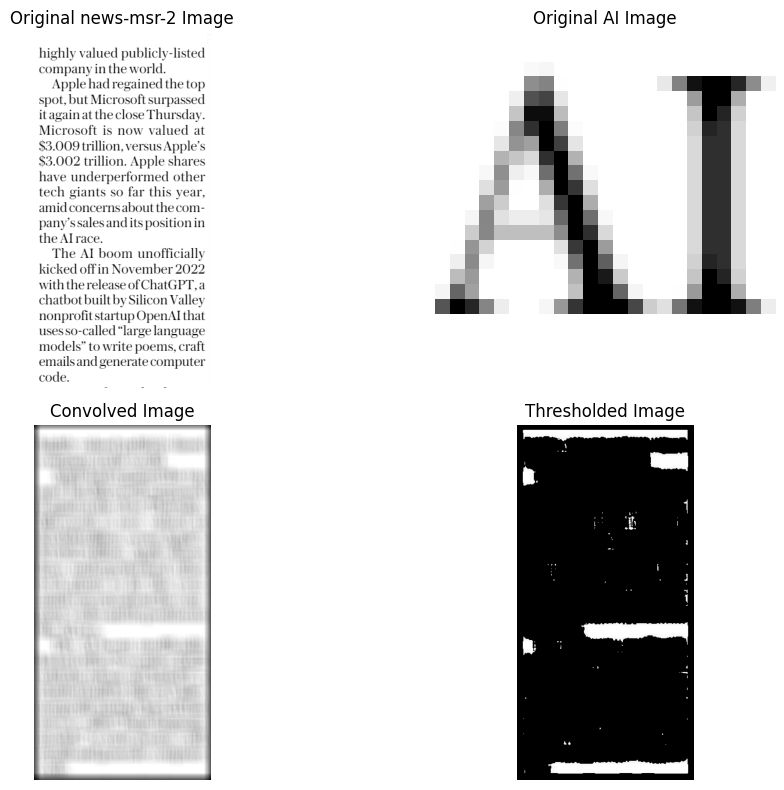

In [81]:

# Load the images
news_msr_2 = tf.image.decode_image(tf.io.read_file('/content/news-msr-2.png'), channels=1)  # Assuming grayscale
AI = tf.image.decode_image(tf.io.read_file('/content/AI.png'), channels=1)  # Assuming grayscale

# Convert images to float32 and normalize them
news_msr_2 = tf.cast(news_msr_2, tf.float32) / 255.0
AI = tf.cast(AI, tf.float32) / 255.0

# Expand dimensions to match TensorFlow's expectation for convolution
news_msr_2 = tf.expand_dims(news_msr_2, axis=0)
AI = tf.expand_dims(AI, axis=-1)  # Expand for the channel dimension

# Perform convolution
convolved_image = tf.nn.conv2d(news_msr_2, AI, strides=[1, 1, 1, 1], padding='SAME')

# Find the maximum value in the convolved image
max_val = tf.reduce_max(convolved_image)

# Set the threshold
threshold_value = max_val - 25

# Threshold the convolved image
thresholded_image = tf.where(convolved_image > threshold_value, convolved_image, 0)

# Convert back to numpy array for visualization
thresholded_image = thresholded_image.numpy().squeeze()

# Display original images, convolved image, and thresholded image
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(news_msr_2.numpy().squeeze(), cmap='gray')
plt.title('Original news-msr-2 Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(AI.numpy().squeeze(), cmap='gray')
plt.title('Original AI Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(convolved_image.numpy().squeeze(), cmap='gray')
plt.title('Convolved Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.tight_layout()
plt.show()


#e) Convolve this output with reflection of AI (around origin)  [4 Marks]
### [Hint: Use $tf.reverse(x,axis)$ function]

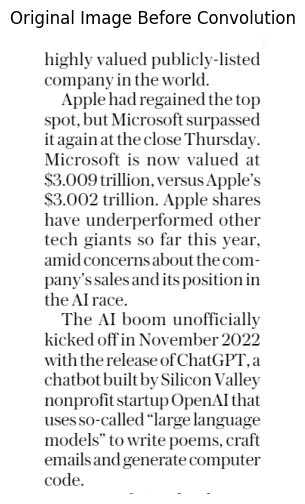

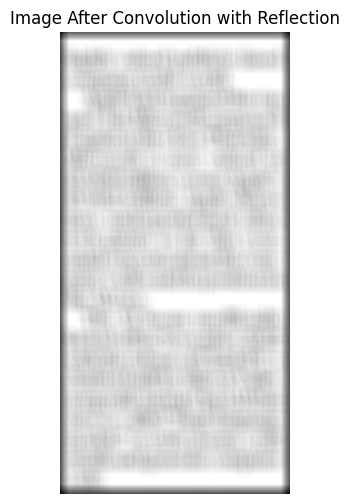

In [82]:
# Load the images
news_msr_2 = tf.image.decode_image(tf.io.read_file('/content/news-msr-2.png'), channels=1)  # Assuming grayscale
AI = tf.image.decode_image(tf.io.read_file('/content/AI.png'), channels=1)  # Assuming grayscale

# Convert images to float32 and normalize them
news_msr_2 = tf.cast(news_msr_2, tf.float32) / 255.0
AI = tf.cast(AI, tf.float32) / 255.0

# Expand dimensions to match TensorFlow's expectation for convolution
news_msr_2 = tf.expand_dims(news_msr_2, axis=0)
AI = tf.expand_dims(AI, axis=-1)  # Expand for the channel dimension

# Display the image before convolution
plt.figure(figsize=(6, 6))
plt.imshow(news_msr_2.numpy().squeeze(), cmap='gray')
plt.title('Original Image Before Convolution')
plt.axis('off')
plt.show()

# Perform convolution (assuming you have already obtained the convolved_image from the previous prompt)
# Define your convolution kernel
conv_kernel = tf.constant([[[[1.0]], [[1.0]], [[1.0]]],
                           [[[1.0]], [[1.0]], [[1.0]]],
                           [[[1.0]], [[1.0]], [[1.0]]]], dtype=tf.float32)

# Perform convolution
convolved_image = tf.nn.conv2d(news_msr_2, conv_kernel, strides=[1, 1, 1, 1], padding='SAME')

# Reverse AI around the origin
reflected_AI = tf.reverse(AI, axis=[0, 1])  # Reverse both height and width axes

# Perform convolution with the reflected AI
convolved_with_reflection = tf.nn.conv2d(convolved_image, reflected_AI, strides=[1, 1, 1, 1], padding='SAME')

# Convert back to numpy array for visualization
convolved_with_reflection = convolved_with_reflection.numpy().squeeze()

# Display or save the convolved image
plt.figure(figsize=(6, 6))
plt.imshow(convolved_with_reflection, cmap='gray')
plt.title('Image After Convolution with Reflection')
plt.axis('off')
plt.show()
